# Hipothesis 3

We want to understand if there is a connection between the condition and the grade of the house.


In [12]:
import pandas as pd
import sys
import missingno as msno
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from haversine import haversine, Unit

from optional.data_processing import *


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


df_all_housing_info = pd.read_csv('data/eda.csv')
#df_all_housing_info.isna().sum()
#type(df_all_housing_info['date'][2])

#df_all_housing_info = df_all_housing_info.query('grade >3')
#df_all_housing_info.info()
print(f"Grade values:{df_all_housing_info.grade.value_counts()}\n"
      f"Condition values:{df_all_housing_info.condition.value_counts()}")

Grade values:grade
7     8974
8     6065
9     2615
6     2038
10    1134
      ... 
5      242
12      89
4       27
13      13
3        1
Name: count, Length: 11, dtype: int64
Condition values:condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64


There is only 1 vote for Grade 3. A single Datapoint can be considered as an outlier, so we should eliminate it

In [13]:
df_all_housing_info=df_all_housing_info.drop(columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','date'])
df_all_housing_info = df_all_housing_info.query('grade>3')

In [14]:
#makes a count Column
count_grade = df_all_housing_info.groupby('grade').agg(
    count=('grade', 'count')
).reset_index()

# Rescale the grade so it matches the condition values
count_grade['rescaled_grade'] = 1 + ((count_grade['grade'] - 4) * (4 / 9)).round(1)


#makes a count Column
#count_cond=df_all_housing_info.condition.value_counts().sort_index()
count_cond=df_all_housing_info.groupby('condition').agg(count =('condition','count'))
count_grade


,grade,count,rescaled_grade
0,4,27,1.0
1,5,242,1.4
2,6,2038,1.9
3,7,8974,2.3
4,8,6065,2.8
5,9,2615,3.2
6,10,1134,3.7
7,11,399,4.1
8,12,89,4.6
9,13,13,5.0


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.v

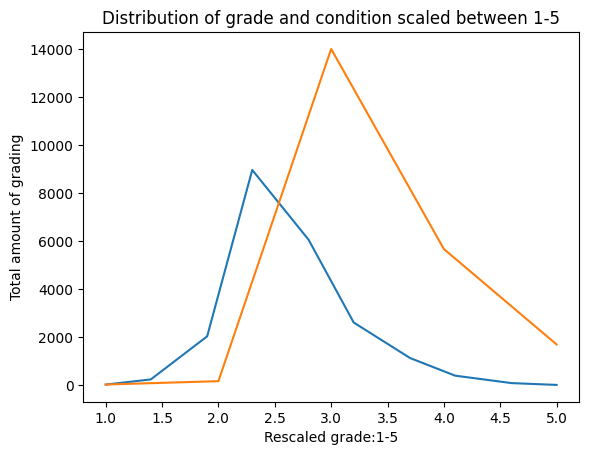

In [33]:
sns.lineplot(data=count_grade,x='rescaled_grade', y='count')
sns.lineplot(data=count_cond, x='condition', y='count')

plt.xlabel('Rescaled grade:1-5')
plt.ylabel('Total amount of grading')
plt.title('Distribution of grade and condition scaled between 1-5')

plt.savefig('data/grade_con_count_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
df_all_housing_info

,id,condition,grade,zipcode,price
0,7129300520,3,7,98178,221900.0
1,6414100192,3,7,98125,538000.0
2,5631500400,3,6,98028,180000.0
3,2487200875,5,7,98136,604000.0
4,1954400510,3,8,98074,510000.0
...,...,...,...,...,...
21592,263000018,3,8,98103,360000.0
21593,6600060120,3,8,98146,400000.0
21594,1523300141,3,7,98144,402101.0
21595,291310100,3,8,98027,400000.0


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.v

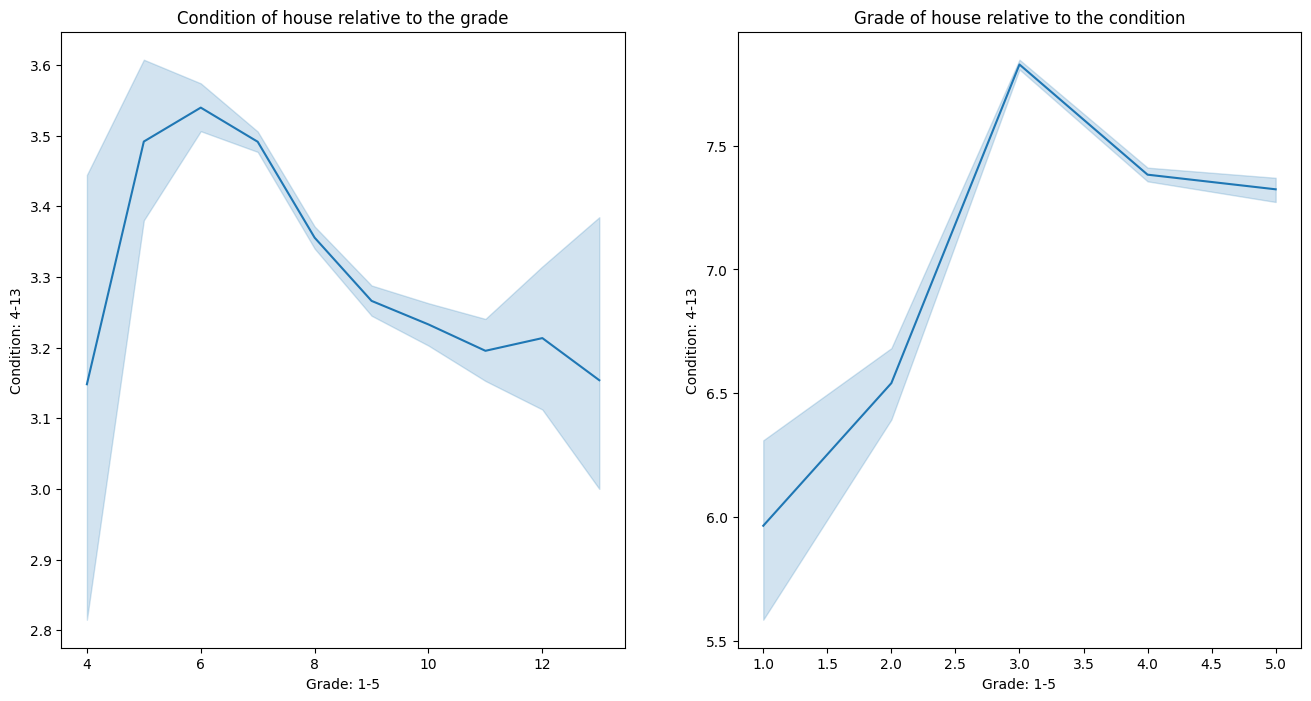

In [32]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

sns.lineplot(data=df_all_housing_info,x= 'grade', y='condition', ax=axes[0])
axes[0].set_xlabel('Grade: 1-5')
axes[0].set_ylabel('Condition: 4-13')
axes[0].set_title('Condition of house relative to the grade')


sns.lineplot(data=df_all_housing_info,x= 'condition', y='grade', ax=axes[1])
axes[1].set_ylabel('Condition: 4-13')
axes[1].set_xlabel('Grade: 1-5')
axes[1].set_title('Grade of house relative to the condition')

plt.savefig('data/grade_con_in_relation.png', dpi=300, bbox_inches='tight')

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.v

<Axes: xlabel='condition', ylabel='grade'>

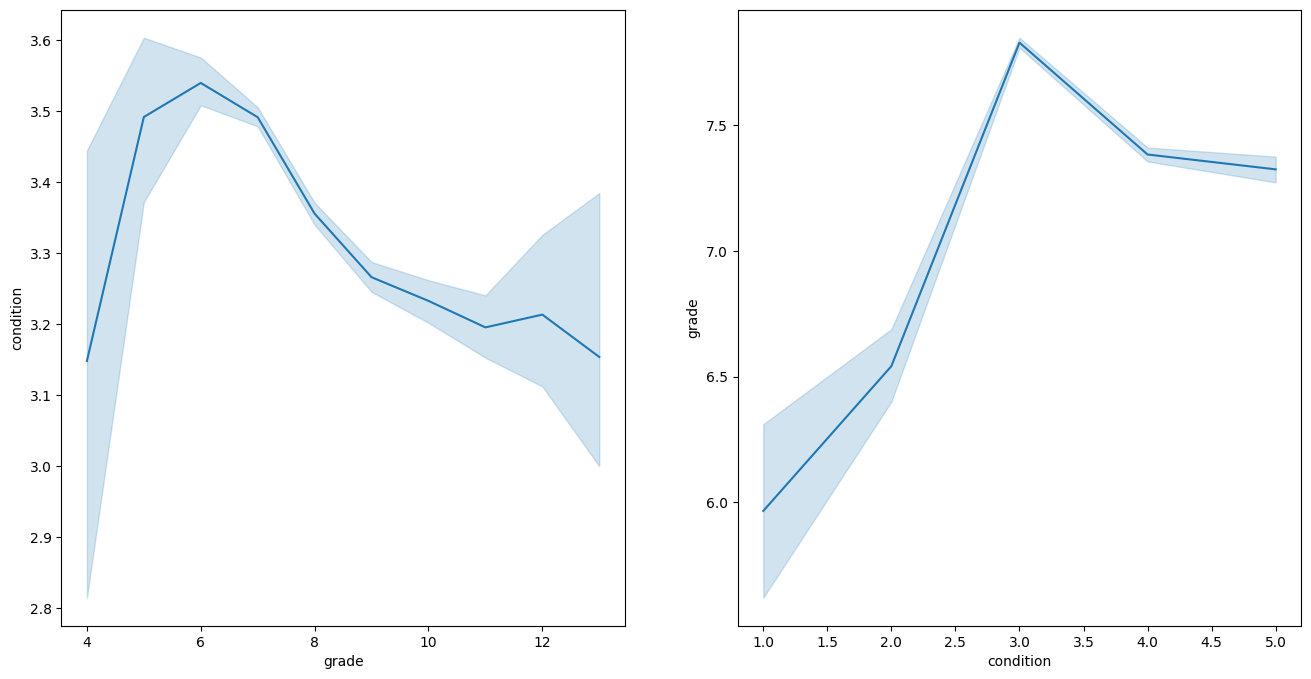

In [18]:
#Graph to see how condition,grade are dependent on each other 
fig, axes = plt.subplots(1,2, figsize=(16,8))

sns.lineplot(data=df_all_housing_info,x= 'grade', y='condition', ax=axes[0])
sns.lineplot(data=df_all_housing_info,x= 'condition', y='grade', ax=axes[1])

In [19]:
correlation_tot = df_all_housing_info[['condition','grade']].corr()
correlation_tot

,condition,grade
condition,1.00000,-0.14652
grade,-0.14652,1.00000


In [20]:
df_all_housing_info_middle = df_all_housing_info.copy()
df_all_housing_info_middle= df_all_housing_info_middle.query('2<grade<6 and 0<condition<3')
correlation_middle = df_all_housing_info_middle[['grade','condition']].corr()
correlation_middle 

,grade,condition
grade,1.000000,-0.139076
condition,-0.139076,1.000000


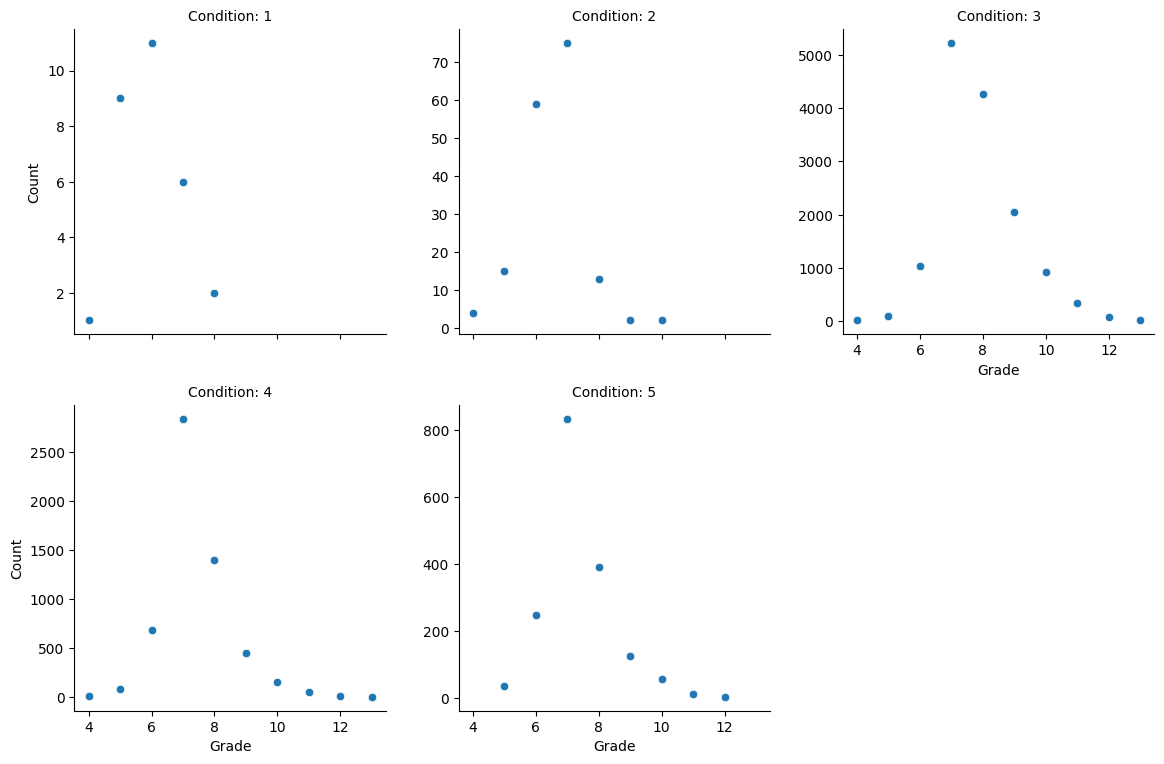

In [31]:
# Berechnung der Count-Spalte
df_all_housing_info['count'] = df_all_housing_info.groupby(['grade', 'condition'])['grade'].transform('count')

# FacetGrid erstellen
g = sns.FacetGrid(df_all_housing_info, col="condition", col_wrap=3, height=4, sharey=False)

# Scatterplot zu jedem Facet hinzufügen
g.map(sns.scatterplot, "grade", "count")

# Globale Titel und Labels
g.set_axis_labels("Grade", "Count")
g.set_titles("Condition: {col_name}")
g.tight_layout(pad=2)

# Plot anzeigen
plt.savefig('data/grade_con_matrix.png', dpi=300, bbox_inches='tight')
plt.show()